#  회귀분석의 결과보고 (Statsmodels)

회귀분석을 통해 연구를 진행하는 논문은 아래의 표와 같은 형태로 결과 보고를 제시한다.

|종속변수|독립변수|비표준화 계수|표준화 계수|t|유의확률|VIF|
|--|--|--|--|--|--|--|
R(.513), R^2(), F(89.57), p(.000), Durbin-Watson=1.750

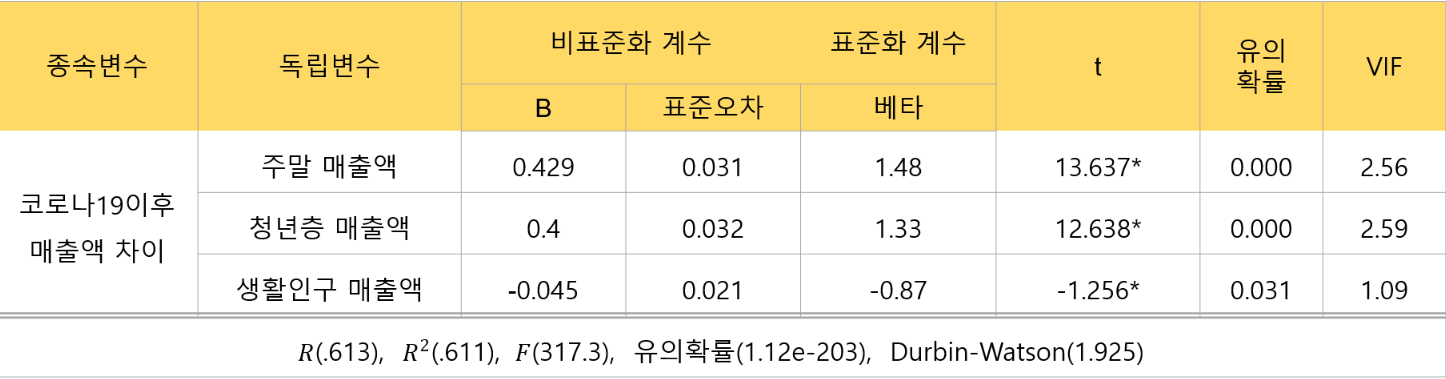
```p 값은 t분포에 대한 것. Durbin-warson ->  분석모델의 유효성 판단```


## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from pandas import read_excel, DataFrame

# 회귀분석을 수행하는 통계패키지
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 표준화 패키지
from sklearn.preprocessing import StandardScaler

### [2] 데이터 가져오기

In [4]:
origin = read_excel("https://data.hossam.kr/mldata/fish.xlsx")
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


## #02. 회귀분석

### [1] 분석을 위한 학습모델 구성

$y = ax + b$ 에 따라 `종속 ~ 독립` 형태로 표현식을 구성한다.

In [6]:
expr = "무게 ~ " + " + ".join(origin.drop('무게', axis=1).columns)
expr

'무게 ~ 길이 + 높이 + 두께'

In [7]:
model = ols(expr, data=origin)
model

### [2] 분석 수행

In [10]:
fit = model.fit()
fit

### [3] 분석결과 확인

In [11]:
tbl = fit.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     무게   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.50e-32
Time:                        10:18:13   Log-Likelihood:                -326.75
No. Observations:                  56   AIC:                             661.5
Df Residuals:                      52   BIC:                             669.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -546.4398     43.785    -12.480      0.000    -634.301    -458.579
길이             2.9083      7.734      0.376      0.708     -12.611      18.427
높이            67.2047     29.447      2.282      0.027       8.115     126.295
두께            67.2603     36.011      1.868      0.067      -5.002     139.522
==============================================================================
Omnibus:                       17.977   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.453
Skew:                           1.267   Prob(JB):                     1.33e-05
Kurtosis:                       4.788   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 결과표를 print 하면 텍스트로 출력된다.
print(tbl)

                            OLS Regression Results                            
Dep. Variable:                     무게   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.50e-32
Time:                        10:18:13   Log-Likelihood:                -326.75
No. Observations:                  56   AIC:                             661.5
Df Residuals:                      52   BIC:                             669.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -546.4398     43.785    -12.480      0.0

## #03. 결과 해석

출력되는 분석 결과표를 통해 모형적합도, 회귀계수, 각 요인에 대한 p값을 해석해야 한다.

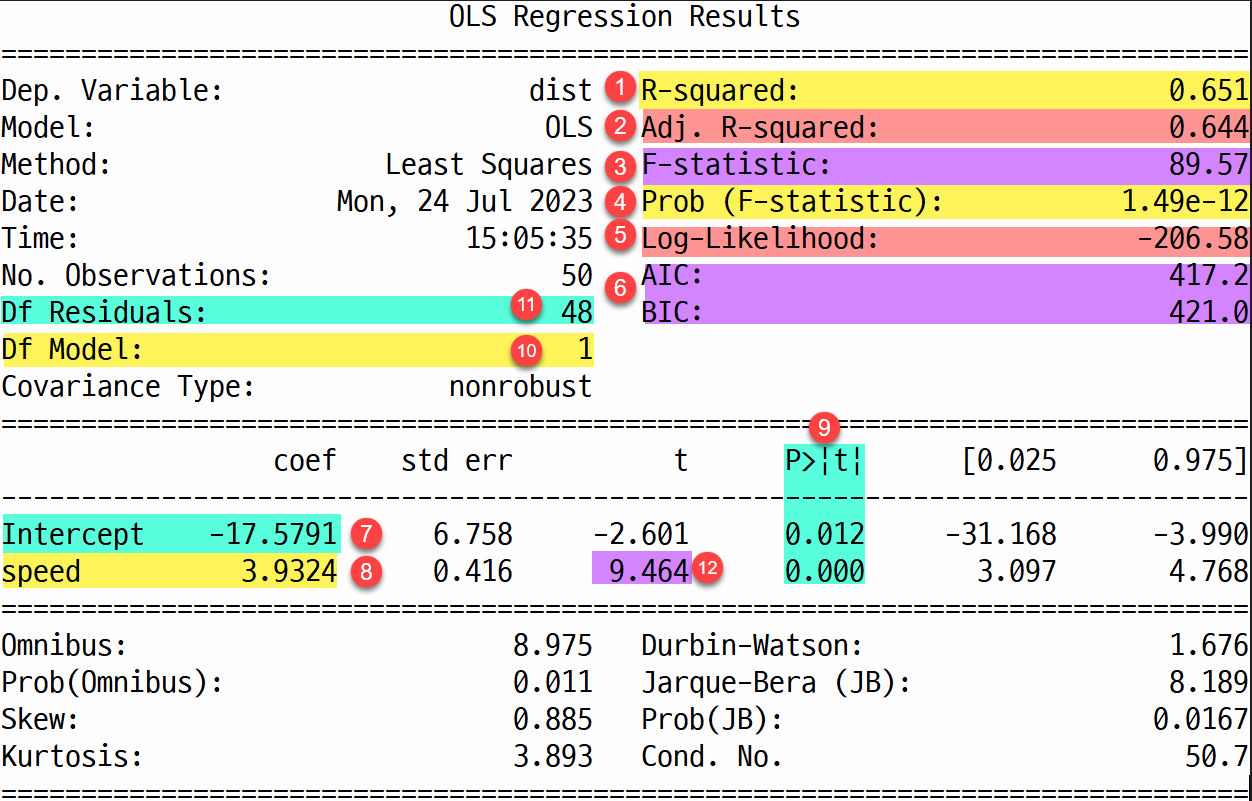

### [1] 모형적합도 해석

모형이 데이터에 잘 맞는 정도를 보여주는 지표

| 번호 | 이름 | 설명 |
|:---:|---|---|
| ① | R-squared | R제곱, 결정계수<br/>모형의 설명력을 의미<br/>dist 제동거리를 speed가 약 65% 설명한다. (각 사례마다 dist에 차이가 있다.) |
| ② | Adj. R-squared | 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정한 값.<br/>서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다.<br/>독립변수가 여러 개인 다중회귀분석에서 사용 |
| ③ | F-statistic | 회귀모형에 대한 (통계적) 유의미성 검증 결과 |
| ④ | Prob(F-statistic) | F-statistic에 대한 p-value. <br/>유의미함 (p < 0.05) |
| ⑤ | Log-Likelihood | 로그 우도: 종속변수가 정규분포라고 가정했을 때의 우도 |
| ⑥ | AIC, BIC | 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다) |

### [2] 회귀계수(coef) 해석

| 번호 | 이름 | 설명 |
|:---:|---|---|
| ⑦ | 절편(Intercept) | speed가 0일 때 dist의 값 |
| ⑧ | 기울기 | 독립변수인 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미 |

#### 회귀계수를 수식으로 정리

$dist = ⑧ \times speed + ⑦$

> dist = ⑧ \times speed + ⑦

즉, 

$dist = 3.9324 \times speed - 17.5791$

> dist = 3.9324 \times speed - 17.5791

### [3] p값

| 번호 | 이름 | 설명 |
|:---:|---|---|
| ⑨ | p값 | 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률 |

이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리

> speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의하다.

## #04. 결과 보고

### [1] 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

$F(⑩, ⑪) = ③, p \lt 0.05%$

#### 모형적합도 보고 예시

> dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다.
> 
> $(F(1,48) = 89.57, p < 0.05)$


### [2] 독립변수에 대해 보고

$t(⑪) = ⑫, p < 0.05$


#### 독립변수 보고 예시

> speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.
> 
> $(t(48) = 9.464, p < 0.05)$

## #05. 회귀분석 결과 다루기

### [1] 결과표 유형 확인

#### 데이터 타입

In [7]:
type(tbl)

statsmodels.iolib.summary.Summary

#### 속성 확인

In [8]:
dir(tbl)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 '_repr_latex_',
 'add_extra_txt',
 'add_table_2cols',
 'add_table_params',
 'as_csv',
 'as_html',
 'as_latex',
 'as_text',
 'extra_txt',
 'tables']

#### 예상되는 프로퍼티 확인

In [13]:
tbl.tables

[<class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>]

In [14]:
for i in tbl.tables:
    print(i)

                            OLS Regression Results                            
Dep. Variable:                     무게   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.50e-32
Time:                        10:18:13   Log-Likelihood:                -326.75
No. Observations:                  56   AIC:                             661.5
Df Residuals:                      52   BIC:                             669.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -546.4398     43.785    -12.480      0.0

In [15]:
tbl.tables[0]

Dep. Variable:,무게,R-squared:,0.942
Model:,OLS,Adj. R-squared:,0.939
Method:,Least Squares,F-statistic:,283.1
Date:,"Tue, 13 Feb 2024",Prob (F-statistic):,3.50e-32
Time:,10:18:13,Log-Likelihood:,-326.75
No. Observations:,56,AIC:,661.5
Df Residuals:,52,BIC:,669.6
Df Model:,3,,
Covariance Type:,nonrobust,,


In [16]:
tbl.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-546.4398,43.785,-12.480,0.000,-634.301,-458.579
길이,2.9083,7.734,0.376,0.708,-12.611,18.427
높이,67.2047,29.447,2.282,0.027,8.115,126.295
두께,67.2603,36.011,1.868,0.067,-5.002,139.522


In [17]:
tbl.tables[2]

Omnibus:,17.977,Durbin-Watson:,0.485
Prob(Omnibus):,0.000,Jarque-Bera (JB):,22.453
Skew:,1.267,Prob(JB):,1.33e-05
Kurtosis:,4.788,Cond. No.,123.


### [2] 첫 번째, 세번째 표의 내용

In [18]:
my = {}

for k in [0, 2]:
    items = tbl.tables[k].data
    #print(items)

    for item in items:
        #print(item)
        n = len(item)

        for i in range(0, n, 2):
            key = item[i].strip()[:-1]
            value = item[i+1].strip()

            if key and value:
                my[key] = value

my

{'Dep. Variable': '무게',
 'R-squared': '0.942',
 'Model': 'OLS',
 'Adj. R-squared': '0.939',
 'Method': 'Least Squares',
 'F-statistic': '283.1',
 'Date': 'Tue, 13 Feb 2024',
 'Prob (F-statistic)': '3.50e-32',
 'Time': '10:18:13',
 'Log-Likelihood': '-326.75',
 'No. Observations': '56',
 'AIC': '661.5',
 'Df Residuals': '52',
 'BIC': '669.6',
 'Df Model': '3',
 'Covariance Type': 'nonrobust',
 'Omnibus': '17.977',
 'Durbin-Watson': '0.485',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '22.453',
 'Skew': '1.267',
 'Prob(JB)': '1.33e-05',
 'Kurtosis': '4.788',
 'Cond. No': '123.'}

### [3] 독립변수 보고 내용 생성

#### (1) 단일 VIF을 확인하기 위한 실험

In [19]:
# 데이터프레임과 VIF값을 확인하고자 하는 변수의 인덱스를 설정
vif = variance_inflation_factor(origin, 1)

if vif < 10:
    print("%s의 VIF: %f (good)" % (origin.columns[1], vif))
else:
    print("%s의 VIF: %f (bad)" % (origin.columns[1], vif))

높이의 VIF: 500.757056 (bad)


#### (2) 표준화 계수(베타) 구하기

독립변수와 종속변수를 표준화 한 후 머신러닝을 수행한 경우에 대한 계수값

##### 데이터 표준화

In [20]:
scaler = StandardScaler()
std = scaler.fit_transform(origin)
std_df = DataFrame(std, columns=origin.columns)
std_df.head()

,길이,높이,두께,무게
0,-2.180225,-2.016507,-1.896175,-1.092422
1,-1.587434,-1.518703,-1.560774,-1.016660
2,-1.442032,-1.417039,-1.316328,-0.993438
3,-1.307815,-1.147103,-1.202633,-0.960056
4,-1.173599,-1.147103,-1.026405,-0.906355


In [21]:
std_model = ols(expr, data=std_df)
std_fit = std_model.fit()
std_fit.params

Intercept   -1.144917e-16
길이           7.547791e-02
높이           5.564681e-01
두께           3.434446e-01
dtype: float64

#### (3) 모든 변수에 대한 처리

In [22]:
my['variables'] = []
name_list = list(origin.columns)

for i, v in enumerate(tbl.tables[1].data):
    #print(v)

    # 변수의 이름
    name = v[0].strip()
    print(name)

    if name not in name_list:
        continue

    # 변수의 이름 목록에서 현재 변수가 몇 번째 항목인지 찾기
    j = name_list.index(name)

    # 구하고자 하는 값
    vif = variance_inflation_factor(origin, j)

    my['variables'].append({
        "name": name,
        "coef": v[1].strip(),
        "std err": v[2].strip(),
        "t": v[3].strip(),
        "P-value": v[4].strip(),
        "Beta": 0,
        "VIF": vif,
    })

my


Intercept
길이
높이
두께


{'Dep. Variable': '무게',
 'R-squared': '0.942',
 'Model': 'OLS',
 'Adj. R-squared': '0.939',
 'Method': 'Least Squares',
 'F-statistic': '283.1',
 'Date': 'Tue, 13 Feb 2024',
 'Prob (F-statistic)': '3.50e-32',
 'Time': '10:18:13',
 'Log-Likelihood': '-326.75',
 'No. Observations': '56',
 'AIC': '661.5',
 'Df Residuals': '52',
 'BIC': '669.6',
 'Df Model': '3',
 'Covariance Type': 'nonrobust',
 'Omnibus': '17.977',
 'Durbin-Watson': '0.485',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '22.453',
 'Skew': '1.267',
 'Prob(JB)': '1.33e-05',
 'Kurtosis': '4.788',
 'Cond. No': '123.',
 'variables': [{'name': '길이',
   'coef': '2.9083',
   'std err': '7.734',
   't': '0.376',
   'P-value': '0.708',
   'Beta': 0,
   'VIF': 338.76030542544714},
  {'name': '높이',
   'coef': '67.2047',
   'std err': '29.447',
   't': '2.282',
   'P-value': '0.027',
   'Beta': 0,
   'VIF': 500.757055790855},
  {'name': '두께',
   'coef': '67.2603',
   'std err': '36.011',
   't': '1.868',
   'P-value': '0.067',
   '

### [4] 결과보고표 만들기

In [23]:
mylist = []

for i in my['variables']:
    item = {
        "종속변수": 'MEDV',
        "독립변수": i['name'],
        "B(비표준화 계수)": i['coef'],
        "표준오차": i['std err'],
        "β(표준화 계수)": i['Beta'],
        "t": i['t'],
        "유의확률" : i['P-value'],
        "VIF": i["VIF"]
    }

    mylist.append(item)

rdf = DataFrame(mylist)
rdf

,종속변수,독립변수,B(비표준화 계수),표준오차,β(표준화 계수),t,유의확률,VIF
0,MEDV,길이,2.9083,7.734,0,0.376,0.708,338.760305
1,MEDV,높이,67.2047,29.447,0,2.282,0.027,500.757056
2,MEDV,두께,67.2603,36.011,0,1.868,0.067,263.015058


### [5] 분석결과 문자열

In [25]:
"𝑅^2(%s), Adj.𝑅^2(%s), 𝐹(%s), 유의확률(%s), Durbin-Watson(%s)" % (my['R-squared'], my['Adj. R-squared'], my['F-statistic'], my['Prob (F-statistic)'], my['Durbin-Watson'])

'𝑅^2(0.942), Adj.𝑅^2(0.939), 𝐹(283.1), 유의확률(3.50e-32), Durbin-Watson(0.485)'

### [6] 모형 적합도 보고 문장

In [26]:
xname_list = rdf['독립변수'].tolist()

"%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %s, p %s 0.05)." % (
    "무게",
    ",".join(xname_list),
    "유의하다" if float(my['Prob (F-statistic)']) <= 0.05 else "유의하지 않다",
    my['Df Model'],
    my['Df Residuals'],
    my['F-statistic'],
    "<=" if float(my['Prob (F-statistic)']) <= 0.05 else ">")

'무게에 대하여 길이,높이,두께로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,52) = 283.1, p <= 0.05).'

### [7] 독립변수 보고

In [27]:
varstr = []

for i, v in enumerate(my['variables']):
    #print(v)

    s = "%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s."
    k = s % (v['name'],
             v['coef'],
             "<=" if float(v['P-value']) <= 0.05 else '>',
             'dist',
             '유의미한 예측변인인 것으로 나타났다' if float(v['P-value']) <= 0.05 else '유의하지 않은 예측변인인 것으로 나타났다'
    )

    varstr.append(k)

varstr

['길이의 회귀계수는 2.9083(p > 0.05)로, dist에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 '높이의 회귀계수는 67.2047(p <= 0.05)로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '두께의 회귀계수는 67.2603(p > 0.05)로, dist에 대하여 유의하지 않은 예측변인인 것으로 나타났다.']